# Handwritten digits classifier

We use feedforward neural networks

## Working with the image data

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [2]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
# Target 
labels = pd.Series(digits_data['target'])
print(labels.shape)
labels

(1797,)


0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10      0
11      1
12      2
13      3
14      4
15      5
16      6
17      7
18      8
19      9
20      0
21      1
22      2
23      3
24      4
25      5
26      6
27      7
28      8
29      9
       ..
1767    4
1768    0
1769    5
1770    3
1771    6
1772    9
1773    6
1774    1
1775    7
1776    5
1777    4
1778    4
1779    7
1780    2
1781    8
1782    2
1783    2
1784    5
1785    7
1786    9
1787    5
1788    4
1789    8
1790    8
1791    4
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int64

In [4]:
# Get data
data = pd.DataFrame(digits_data['data'])
print(data.shape)
data.head(1)

(1797, 64)


0    1    2     3    4    5    6    7    8    9  ...    54   55   56   57  \
0  0.0  0.0  5.0  13.0  9.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    58    59    60   61   62   63  
0  6.0  13.0  10.0  0.0  0.0  0.0  

[1 rows x 64 columns]

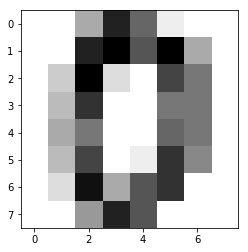

In [5]:
# Show the first image
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8, 8)

plt.imshow(np_image, cmap='gray_r')

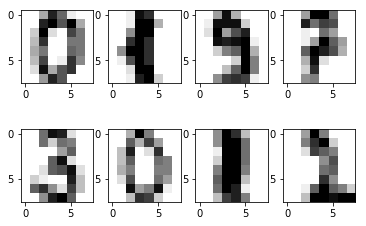

In [6]:
# Generate a scatter plot grid, 2 rows - 4 columns
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Split 50-50 Traning + Testing
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test_knn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['correct_label'] == train_test_df['predicted_label'])/len(train_test_df)
    return overall_accuracy

def cross_validate(k, split=4):
    fold_accuracies = []
    kf = KFold(n_splits=split, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
    
        knn = train_knn(k, train_features, train_labels)
        overall_accuracy = test_knn(knn, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

# Appying the cross validation für 1-Nearest Neighbor
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

## Showing different `k` Nearest Neighbors accuracies

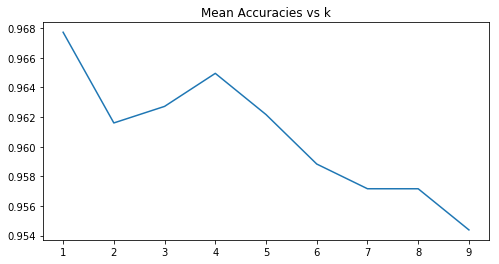

In [8]:
k_values = list(range(1, 10))
k_overall_accuracies = []

for k in k_values:
    accuracy = np.mean(cross_validate(k))
    k_overall_accuracies.append(accuracy)

plt.figure(figsize=(8,4))
plt.plot(k_values, k_overall_accuracies)
plt.title('Mean Accuracies vs k')
plt.show()

There are a few downsides to using k-nearest neighbors:
- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore


## Neural Network with one-hidden layer

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# Split 50-50 % for training-test data
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch, split=4):
    fold_accuracies = []
    kf = KFold(n_splits = split, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/Users/khanhdeux/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


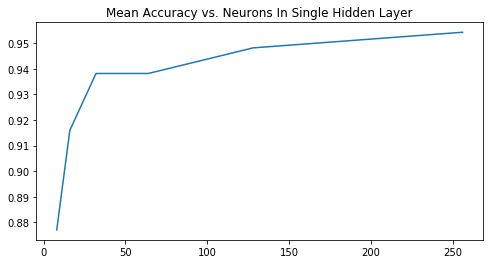

In [10]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

### Summary:

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately `86%` to approximately `94%`. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately `96%` accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

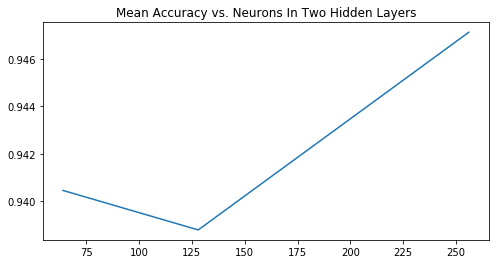

In [11]:
nn_two_neurons = [
    (64, 64),
    (128, 128),
    (256, 256)
]

nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [12]:
nn_two_accuracies

[0.9404516208859193, 0.9387849542192527, 0.9471318980450384]

### Summary:

Using 2 hidden layers improved our simple accuracy to `95%`. Since wir have to take overfitting into consideration, using 4-fold cross validation also gives us a bit more assurance that the model is generalizing to achieve the extra `1%` in simple accuracy over the single hidden layer networks we tried earlier.

## Neural network with three hidden layers

/Users/khanhdeux/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


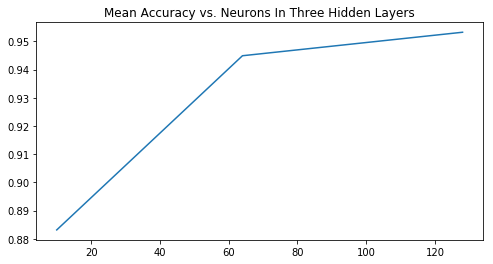

In [13]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate(n, 6)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [14]:
nn_three_accuracies

[0.8831512448903753, 0.944920104050539, 0.9532515793385358]

## Summary:

Using 3 hidden layers improved our simple accuracy to fast `96%`, even with `6-fold` cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.